In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.featureScheduler.observatory import Speed_observatory

import healpy as hp

In [2]:
survey_length = 0.5 # days
# Define what we want the final visit ratio map to look like
survey_filters = ['u','g']
surveys = []

for f in survey_filters:
    bfs = []
    bfs.append(fs.Slewtime_basis_function_cost(filtername=f))
    bfs.append(fs.Visit_repeat_basis_function_cost(filtername=f,survey_filters=survey_filters))
    bfs.append(fs.Target_map_basis_function_cost(filtername=f, survey_filters=survey_filters))
    bfs.append(fs.Normalized_alt_basis_function_cost(filtername=f))
    bfs.append(fs.Hour_angle_basis_function_cost())
    #bfs.append(fs.Depth_percentile_basis_function_cost())
    weights = np.array([3,1,1,2,1])
    surveys.append(fs.Simple_greedy_survey_fields_cost(bfs, weights, filtername=f, block_size= 5))

scheduler = fs.Core_scheduler_cost(surveys)
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='pairs_survey.db', delete_past=True)

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:344: RuntimeWarning: invalid value encountered in arccos
  self.ha_limit = np.arccos(cosha)*12/np.pi
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:388: RuntimeWarning: invalid value encountered in greater
  self.feature[np.where(self.feature > time_to_twilight)] = time_to_twilight
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:391: RuntimeWarning: invalid value encountered in less
  good = np.where(current_ha < -self.ha_limit)
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:399: RuntimeWarning: invalid value encountered in less
  self.feature[np.where(self.feature < 0)] = 0.
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/basis_functions.py:422: RuntimeWarning: invalid value encountered in greater_equal
  cat1 = np.where(WFD_cat & 

(array([0]), array([ 5.]))
(array([0]), array([ 5.]))
(array([0]), array([ 5.]))
(array([0]), array([ 5.]))
(array([5]), array([ 5.]))
(array([0]), array([ 0.83333333]))
(array([10]), array([ 5.]))
(array([0]), array([ 0.45454545]))
(array([15]), array([ 5.]))
(array([0]), array([ 0.3125]))
(array([20]), array([ 5.]))
(array([0]), array([ 0.23809524]))
(array([25]), array([ 5.]))
(array([0]), array([ 0.19230769]))
(array([30]), array([ 5.]))
(array([0]), array([ 0.16129032]))
(array([35]), array([ 5.]))
(array([0]), array([ 0.13888889]))
(array([40]), array([ 5.]))
(array([0]), array([ 0.12195122]))
(array([45]), array([ 5.]))
(array([0]), array([ 0.10869565]))
(array([50]), array([ 5.]))
(array([0]), array([ 0.09803922]))
(array([55]), array([ 5.]))
(array([0]), array([ 0.08928571]))
(array([60]), array([ 5.]))
(array([0]), array([ 0.08196721]))
progress = 8.5%(array([65]), array([ 5.]))
(array([0]), array([ 0.07575758]))
(array([70]), array([ 5.]))
(array([0]), array([ 0.07042254]))


(array([412]), array([ 5.]))


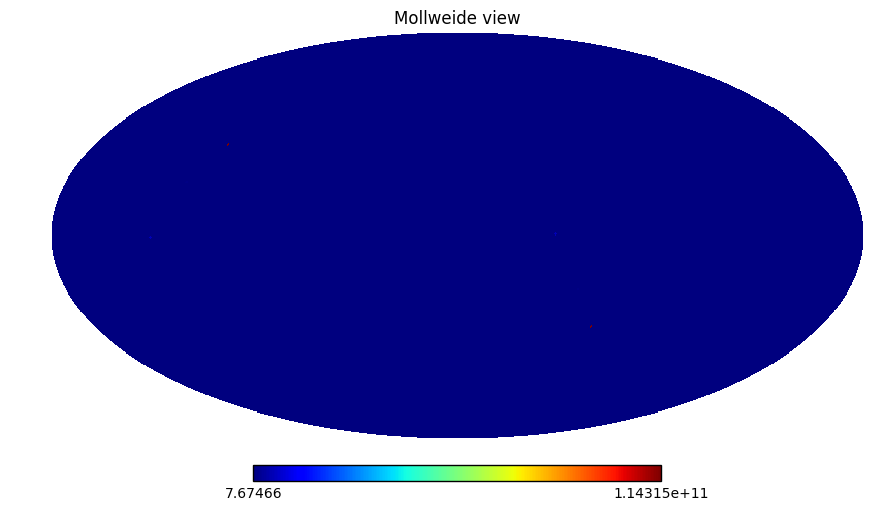

In [9]:
hp.mollview(scheduler.surveys[0].calc_cost_function())

(array([412]), array([ 5.]))
(array([0]), array([ 0.01210654]))


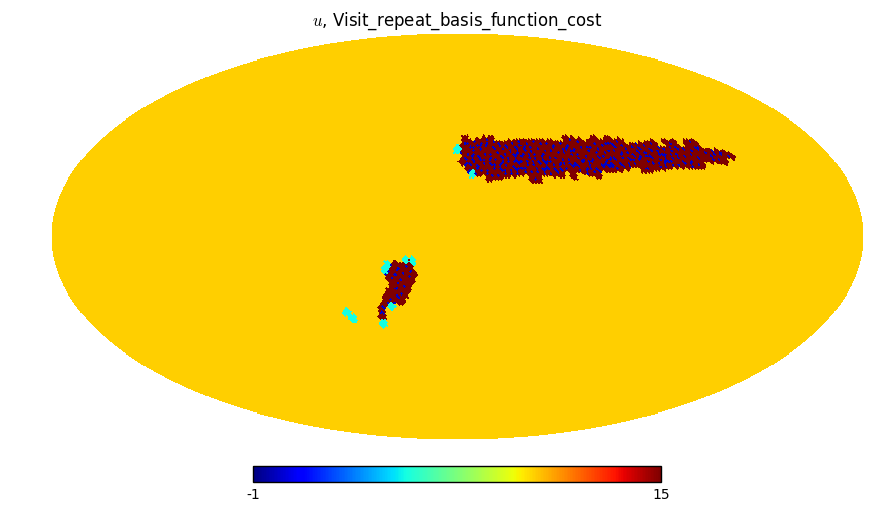

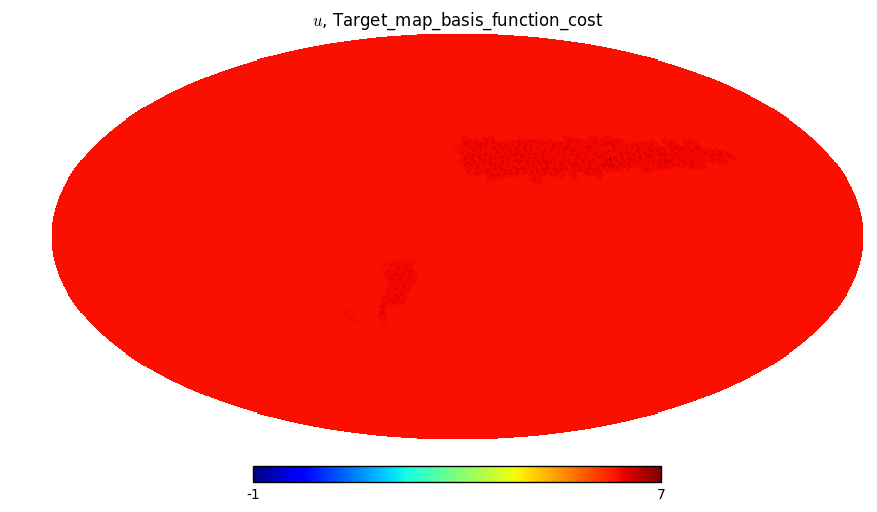

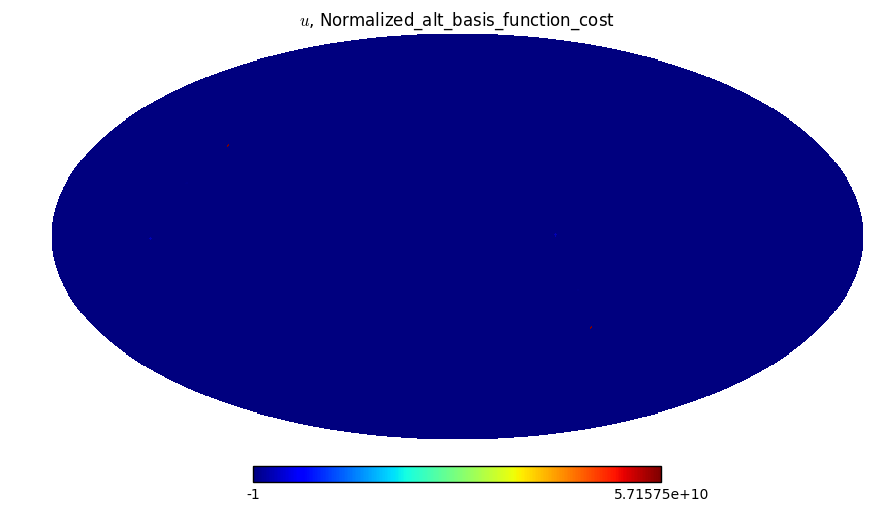

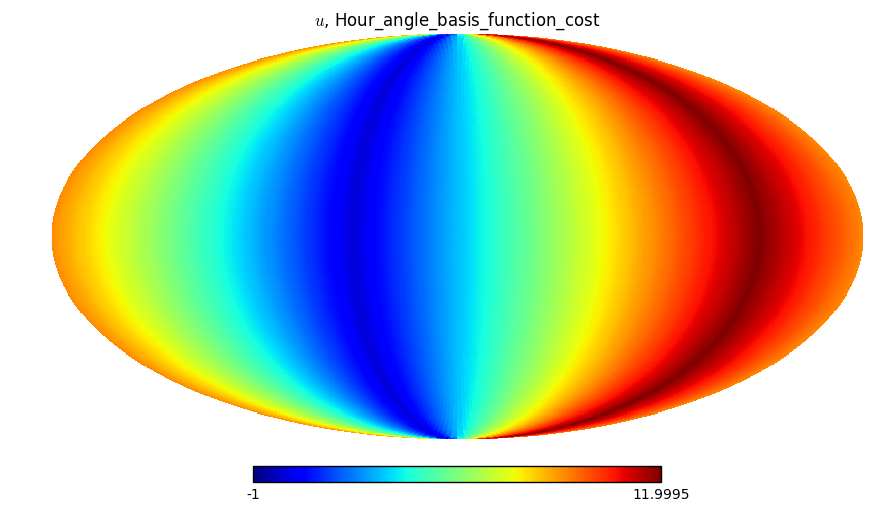

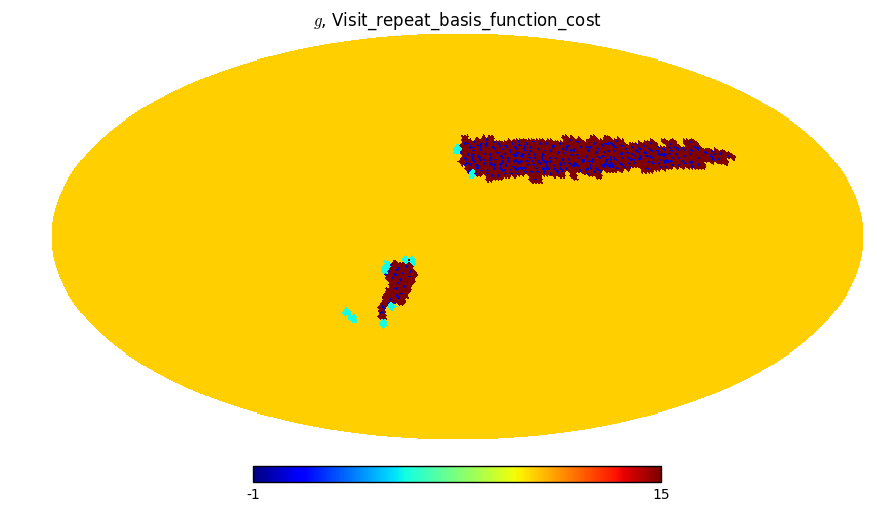

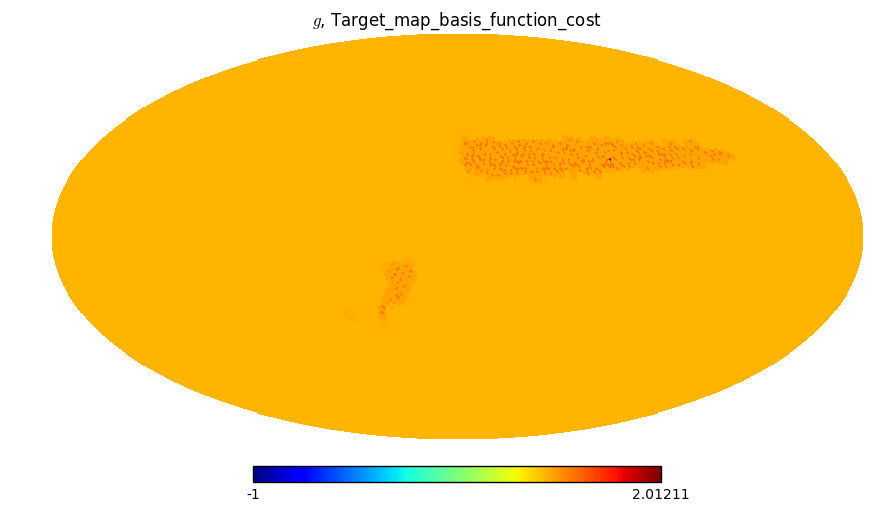

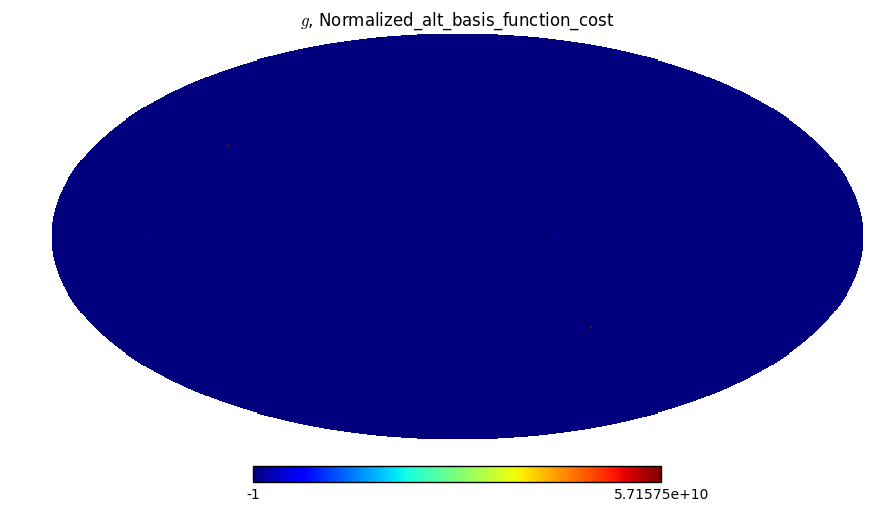

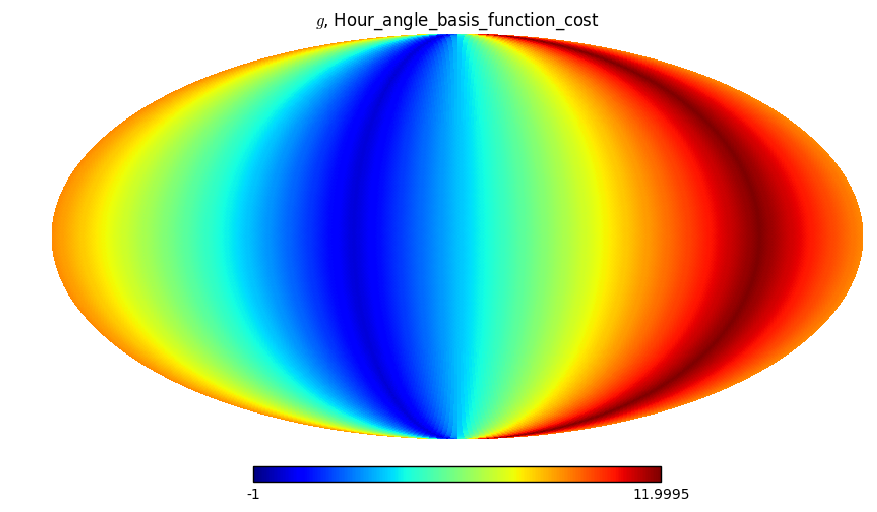

In [11]:
for fn, survey in zip(['u', 'g'], scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, min=-1, title='$%s$, %s' % (fn, type(basis_function).__name__.split('.')[-1]))